<a href="https://colab.research.google.com/github/JavierDoom/Programa-de-Fidelizaci-n-de-Clientes./blob/main/decisiones_de_negocio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ---------------------------------------------
#             Importamos las librerías necesarias
# ---------------------------------------------
import pandas as pd  # Para manejo de datos
import numpy as np   # Para operaciones matemáticas
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [ ]:
# ---------------------------------------------
#               PARTE 1: Cargar dataset de hipótesis
# ---------------------------------------------
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')  # Separador ; según el CSV original

# Mostrar las primeras filas para inspección
print(hypotheses.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


In [ ]:


# ---------------------------------------------
#       Limpiar posibles espacios en los nombres de las columnas
# ---------------------------------------------
hypotheses.columns = hypotheses.columns.str.strip()

# Verificar los nombres de las columnas
print(hypotheses.columns)



Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')


In [ ]:
# =============================================
#  CALCULAR ICE: Prioridad basada en Impacto, Confianza y Esfuerzo
#  Fórmula: ICE = (Impact * Confidence) / Effort
# =============================================

hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# ---------------------------------------------
# Ordenar hipótesis por puntaje ICE de mayor a menor
# ---------------------------------------------
hypotheses_ICE = hypotheses.sort_values(by='ICE', ascending=False)

# ---------------------------------------------
# Mostrar las hipótesis ordenadas con un formato bonito
# ---------------------------------------------
from IPython.display import display

print("### Hipótesis ordenadas según ICE ###\n")
display(hypotheses_ICE[['Hypothesis', 'ICE']])


### Hipótesis ordenadas según ICE ###



,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [ ]:


# =============================================
#  CALCULAR RICE: Prioridad considerando Alcance
#  Fórmula: RICE = (Reach * Impact * Confidence) / Effort
# =============================================

hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# ---------------------------------------------
# Ordenar hipótesis por puntaje RICE de mayor a menor
# ---------------------------------------------
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses_RICE = hypotheses.sort_values(by='RICE', ascending=False)

# ---------------------------------------------
# Mostrar las hipótesis ordenadas por RICE
# ---------------------------------------------
print("### Hipótesis ordenadas según RICE ###\n")
display(hypotheses_RICE[['Hypothesis', 'RICE']])



### Hipótesis ordenadas según RICE ###



,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


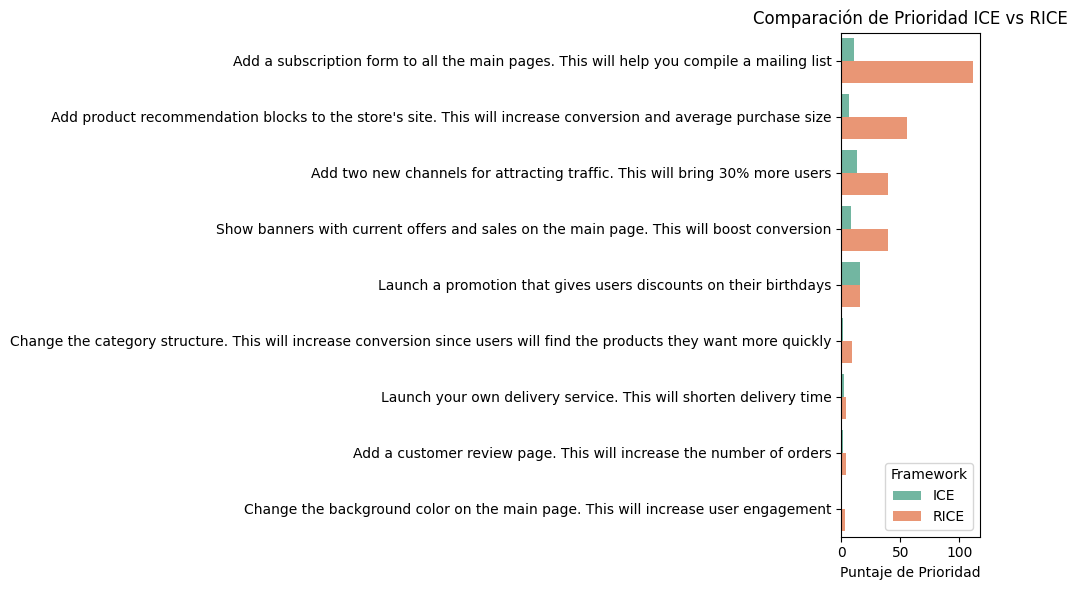

In [ ]:

# =============================================
#     GRÁFICO COMPARATIVO ICE vs RICE MEJORADO
# =============================================
# Tomamos las top 9 hipótesis según RICE
top_hypotheses = hypotheses[['Hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False).head(9)

# Convertimos a formato largo para seaborn
df_melt = top_hypotheses.melt(id_vars='Hypothesis', value_vars=['ICE','RICE'], var_name='Framework', value_name='Puntaje')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, y='Hypothesis', x='Puntaje', hue='Framework', palette='Set2')
plt.xlabel('Puntaje de Prioridad')
plt.ylabel('')
plt.title('Comparación de Prioridad ICE vs RICE')
plt.legend(title='Framework', loc='lower right')
plt.tight_layout()
plt.show()


### 📌 Comentarios de análisis sobre RICE

- **RICE** es un framework que prioriza hipótesis considerando **Reach (alcance)**, además de **Impact**, **Confidence** y **Effort**.  
- La fórmula utilizada:  

\[
\text{RICE} = \frac{\text{Reach} \times \text{Impact} \times \text{Confidence}}{\text{Effort}}
\]

- Al incluir **Reach**, podemos identificar hipótesis que, aunque tengan menor impacto individual, afecten a un gran número de usuarios.  
- Comparando la lista de prioridades de **ICE** con **RICE**, podemos ver **cómo cambia la posición de cada hipótesis**:  
  - Algunas hipótesis suben de prioridad porque tienen un gran alcance.  
  - Otras bajan porque su impacto o alcance es limitado.  
- Esto ayuda al equipo de marketing a **decidir qué hipótesis probar primero** de manera más estratégica.  
- Presentar ambas listas (ICE y RICE) junto con un gráfico comparativo puede ser **muy útil para visualización y justificación**.

In [ ]:
# =============================================
#       PARTE 2: Analisis de test A/B
# =============================================

import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

# ---------------------------------------------
# Cargar datos de pedidos y visitas
# ---------------------------------------------
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# ---------------------------------------------
# Convertir la columna 'date' a tipo datetime
# ---------------------------------------------
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

# ---------------------------------------------
# Verificar la carga de los datos
# ---------------------------------------------
display(orders.head())
display(visits.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### 📌 Comentarios de análisis sobre la carga de datos

- Se cargan los datasets `orders_us.csv` y `visits_us.csv`.
- Convertimos la columna `date` a **datetime** para poder trabajar con series temporales.
- Esta preparación es esencial para poder:
  - Graficar ingresos acumulados.
  - Calcular tamaños promedio de pedidos.
  - Calcular tasas de conversión diarias.
- `display()` permite verificar rápidamente que los datos se hayan leído correctamente y que las fechas estén en el formato correcto.

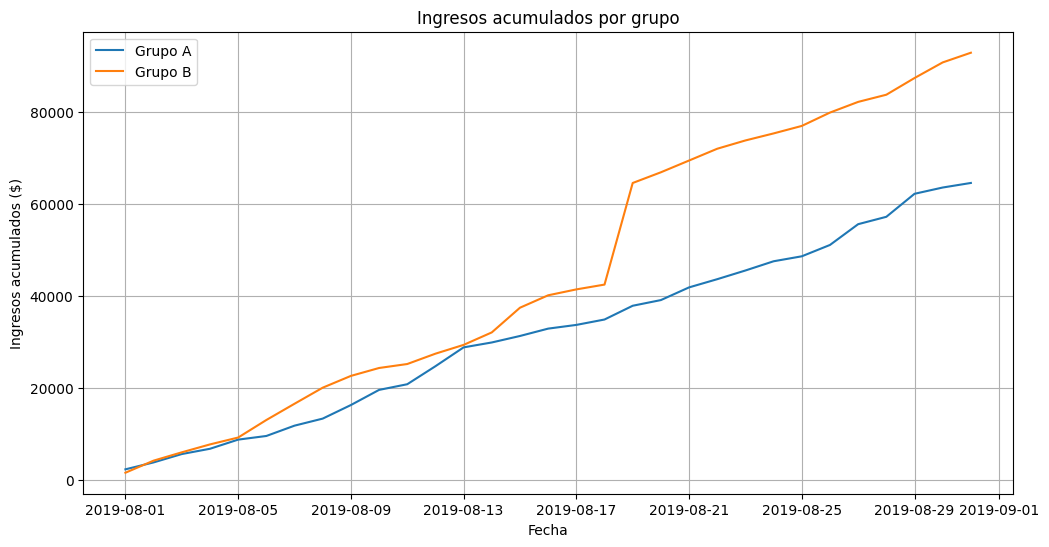

In [ ]:

# =============================================
#       INGRESOS ACUMULADOS POR GRUPO
# =============================================

# Agrupar por fecha y grupo, sumando los ingresos
orders_grouped = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()

# Calcular ingresos acumulados por grupo
orders_grouped['cumulative_revenue'] = orders_grouped.groupby('group')['revenue'].cumsum()

# Graficar ingresos acumulados
plt.figure(figsize=(12,6))
for group in orders_grouped['group'].unique():
    plt.plot(
        orders_grouped[orders_grouped['group'] == group]['date'],
        orders_grouped[orders_grouped['group'] == group]['cumulative_revenue'],
        label=f'Grupo {group}'
    )
plt.title('Ingresos acumulados por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados ($)')
plt.legend()
plt.grid(True)
plt.show()


### Ingresos acumulados por grupo

El gráfico muestra cómo se acumulan los ingresos en cada grupo a lo largo del tiempo.  
- Permite comparar la evolución de los ingresos entre el grupo A y el B.  
- Un grupo con ingresos consistentemente mayores puede indicar un desempeño superior.  
- Esta visualización sirve para observar tendencias, pero **no indica significancia estadística**, solo proporciona un análisis exploratorio.

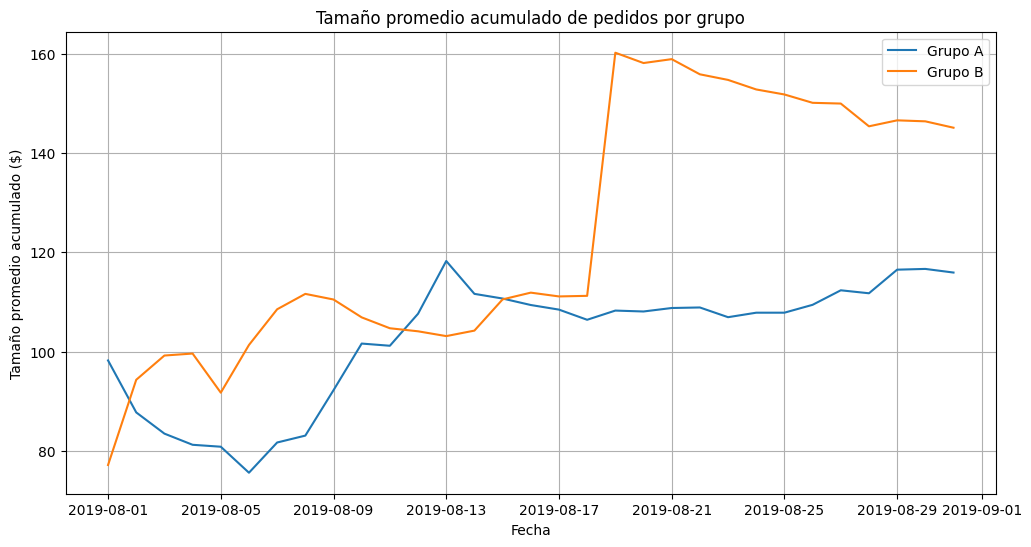

In [ ]:

# =============================================
#       TAMAÑO PROMEDIO ACUMULADO DE LOS PEDIDOS POR GRUPO
# =============================================

# Agrupar por fecha y grupo, sumando ingresos y contando pedidos
orders_grouped_sum = orders.groupby(['date', 'group']).agg({'revenue':'sum', 'transactionId':'count'}).reset_index()
orders_grouped_sum.rename(columns={'transactionId':'orders_count'}, inplace=True)

# Calcular tamaño promedio acumulado de pedidos
orders_grouped_sum['cumulative_revenue'] = orders_grouped_sum.groupby('group')['revenue'].cumsum()
orders_grouped_sum['cumulative_orders'] = orders_grouped_sum.groupby('group')['orders_count'].cumsum()
orders_grouped_sum['cumulative_avg_order'] = orders_grouped_sum['cumulative_revenue'] / orders_grouped_sum['cumulative_orders']

# Graficar tamaño promedio acumulado de pedidos
plt.figure(figsize=(12,6))
for group in orders_grouped_sum['group'].unique():
    plt.plot(
        orders_grouped_sum[orders_grouped_sum['group'] == group]['date'],
        orders_grouped_sum[orders_grouped_sum['group'] == group]['cumulative_avg_order'],
        label=f'Grupo {group}'
    )
plt.title('Tamaño promedio acumulado de pedidos por grupo')
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio acumulado ($)')
plt.legend()
plt.grid(True)
plt.show()


### Tamaño promedio acumulado de los pedidos por grupo

El gráfico muestra la evolución del tamaño promedio de los pedidos para cada grupo durante la prueba A/B:  
- Permite identificar si un grupo está generando pedidos de mayor valor.  
- Un aumento o disminución significativa en el tamaño promedio puede indicar diferencias en comportamiento de compra.  
- Esta visualización sigue siendo exploratoria; aún no se evalúa la **significancia estadística**.

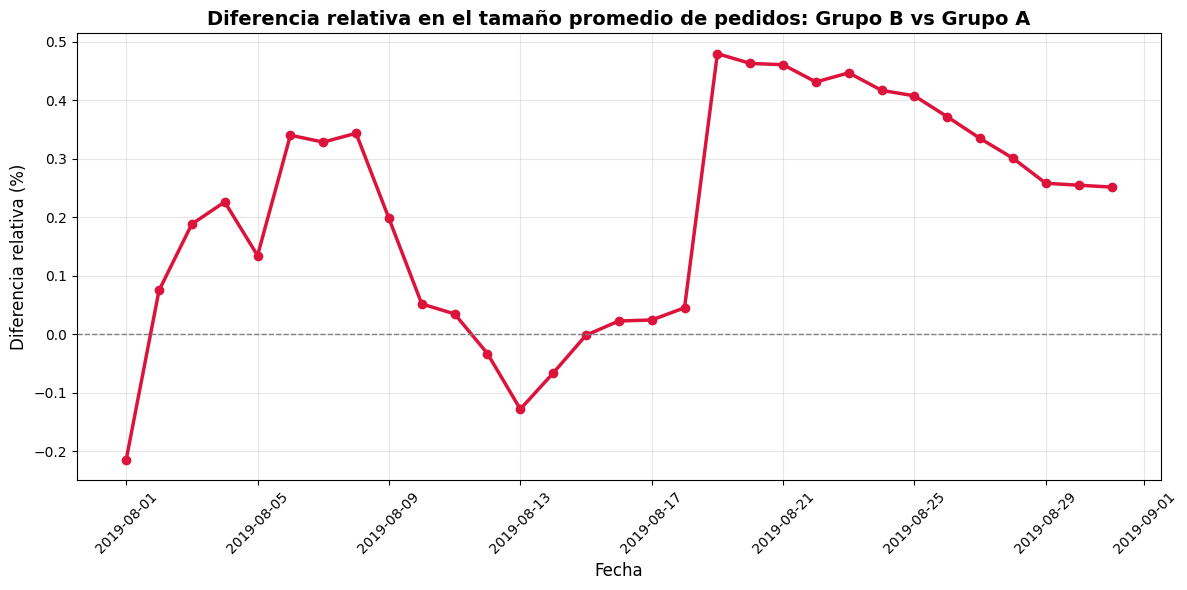

In [ ]:

# =============================================
#      DIFERENCIA RELATIVA EN EL TAMAÑO PROMEDIO DE PEDIDOS
# =============================================

# Pivotar los datos para facilitar el cálculo de la diferencia relativa
pivot_orders = orders_grouped_sum.pivot(index='date', columns='group', values='cumulative_avg_order').reset_index()

# Calcular diferencia relativa del grupo B con respecto al grupo A
pivot_orders['relative_diff_B_vs_A'] = (pivot_orders['B'] / pivot_orders['A']) - 1

# Graficar la diferencia relativa
plt.figure(figsize=(12,6))
plt.plot(pivot_orders['date'], pivot_orders['relative_diff_B_vs_A'], color='crimson', linewidth=2.5, marker='o')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Diferencia relativa en el tamaño promedio de pedidos: Grupo B vs Grupo A', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Diferencia relativa (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Diferencia relativa en el tamaño promedio de pedidos

El gráfico muestra la diferencia relativa del tamaño promedio de los pedidos del grupo B en comparación con el grupo A:  
- Valores negativos indican que los pedidos del grupo B son menores que los del grupo A.  
- Valores positivos indicarían que el grupo B supera al grupo A en tamaño promedio de pedido.  
- La línea horizontal en 0 representa igualdad entre grupos.  
- Esta visualización permite detectar tendencias y posibles problemas en el comportamiento de compra del grupo B.

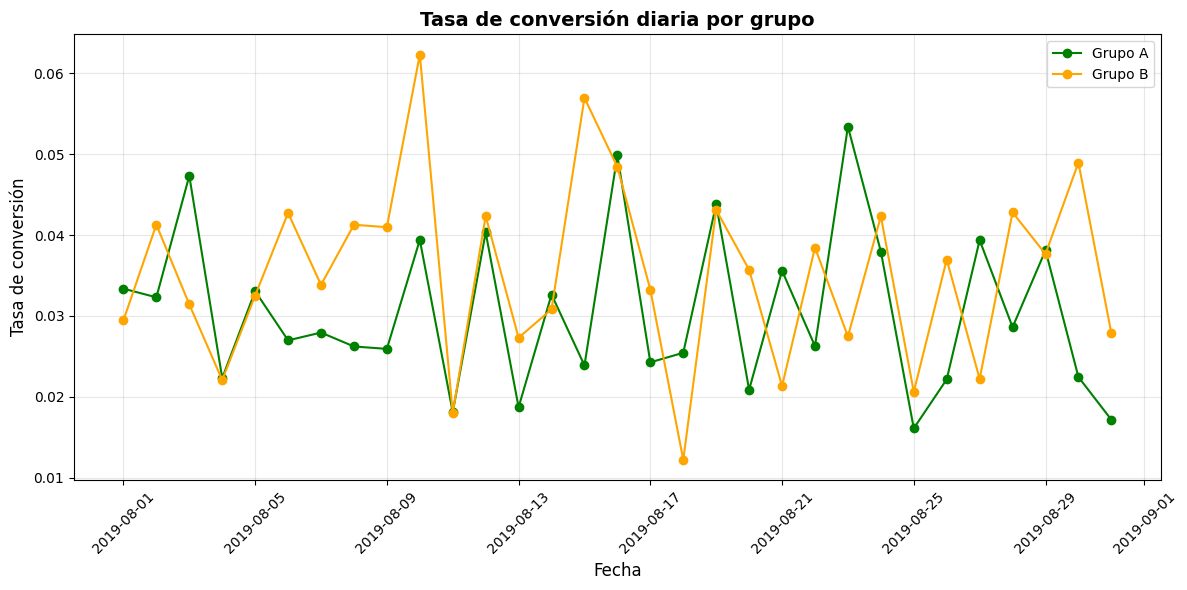

In [ ]:

# =============================================
#      TASA DE CONVERSIÓN DIARIA POR GRUPO
# =============================================

# Agrupar pedidos por fecha y grupo para contar número de pedidos diarios
orders_daily = orders.groupby(['date', 'group']).agg({'transactionId': 'nunique'}).reset_index()
orders_daily.columns = ['date', 'group', 'orders']

# Unir con el número de visitas diarias para calcular la tasa de conversión
conversion_daily = orders_daily.merge(visits, on=['date', 'group'])
conversion_daily['conversion'] = conversion_daily['orders'] / conversion_daily['visits']

# Graficar la tasa de conversión diaria
plt.figure(figsize=(12,6))
for grp, color in zip(['A', 'B'], ['green', 'orange']):
    grp_data = conversion_daily[conversion_daily['group'] == grp]
    plt.plot(grp_data['date'], grp_data['conversion'], marker='o', linestyle='-', color=color, label=f'Grupo {grp}')

plt.title('Tasa de conversión diaria por grupo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tasa de conversión', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Tasa de conversión diaria por grupo

- El gráfico muestra cómo varía la tasa de conversión diaria de los grupos A y B.  
- La tasa de conversión se calcula como la relación entre pedidos y visitas por día.  
- Observar tendencias ascendentes o descendentes permite evaluar la efectividad de cada grupo en tiempo real.  
- Diferencias persistentes entre grupos podrían indicar que un grupo tiene un desempeño consistentemente mejor.

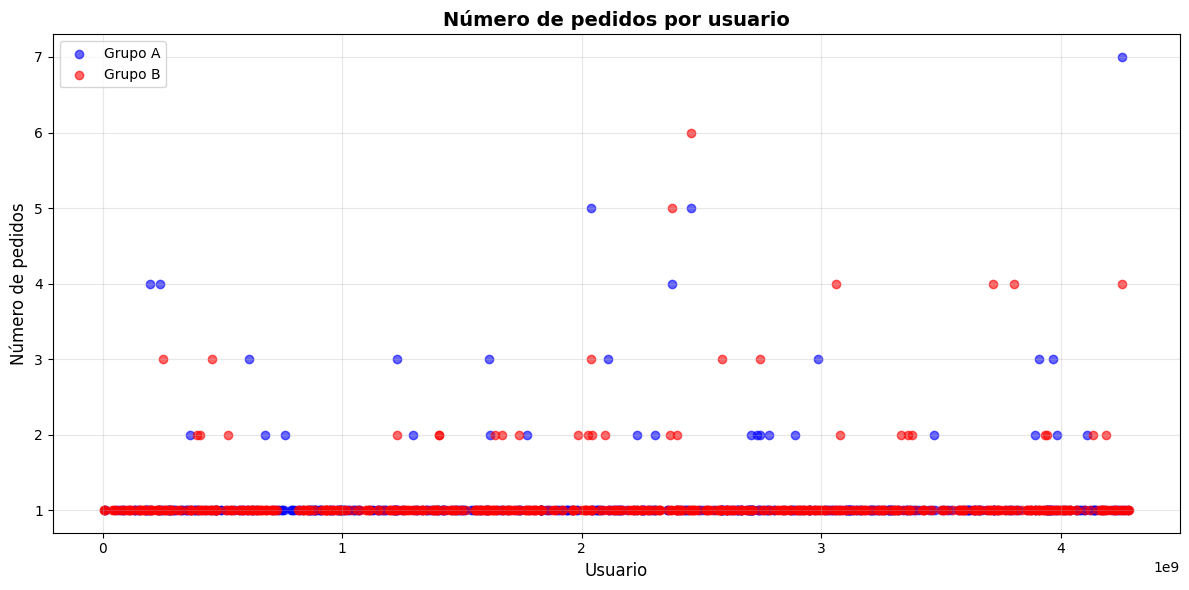

array([2., 4.])

In [ ]:

# =============================================
#       NÚMERO DE PEDIDOS POR USUARIO
# =============================================

# Agrupar pedidos por usuario y grupo
orders_per_user = orders.groupby(['group', 'visitorId']).agg({'transactionId':'nunique'}).reset_index()
orders_per_user.columns = ['group', 'visitorId', 'orders']

# Graficar dispersión de número de pedidos por usuario
plt.figure(figsize=(12,6))
for grp, color in zip(['A', 'B'], ['blue', 'red']):
    grp_data = orders_per_user[orders_per_user['group'] == grp]
    plt.scatter(grp_data['visitorId'], grp_data['orders'], alpha=0.6, color=color, label=f'Grupo {grp}')

plt.title('Número de pedidos por usuario', fontsize=14, fontweight='bold')
plt.xlabel('Usuario', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular percentiles 95 y 99 para detectar usuarios con pedidos anómalos
percentiles_orders = np.percentile(orders_per_user['orders'], [95, 99])
percentiles_orders


### Número de pedidos por usuario

- Cada punto representa la cantidad de pedidos realizados por un usuario.  
- La mayoría de usuarios realiza 1 o 2 pedidos, pero algunos tienen un número significativamente mayor.  
- Los percentiles 95 y 99 nos ayudan a identificar a los usuarios anómalos (outliers) que podrían sesgar los resultados del test A/B.  
- Estos usuarios anómalos deberán considerarse al filtrar los datos antes del análisis estadístico.

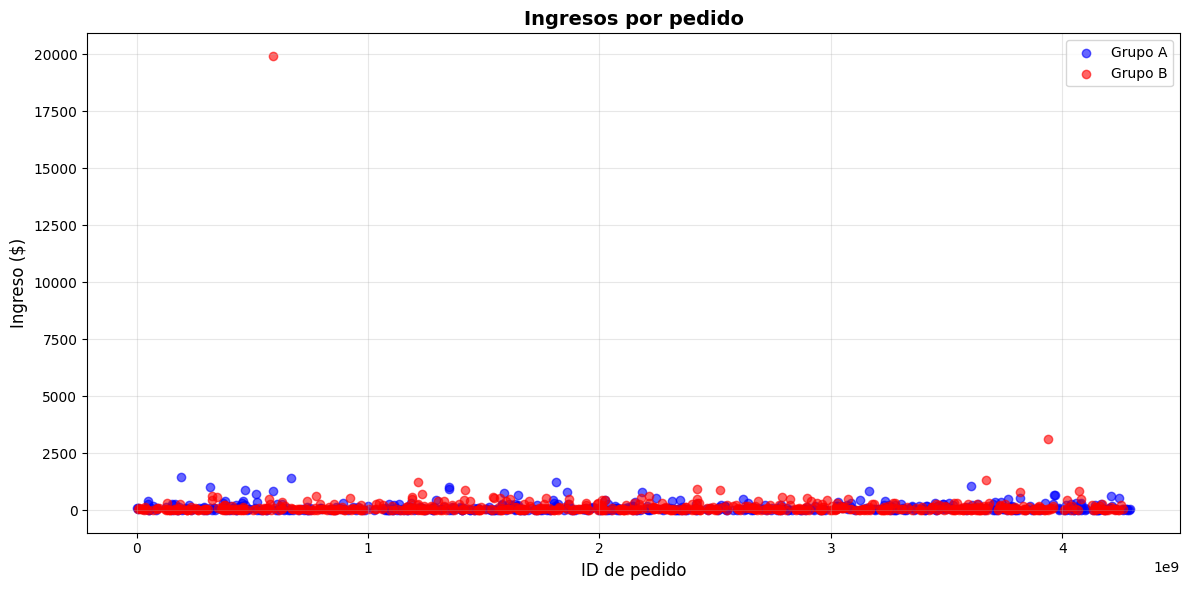

array([435.54 , 900.904])

In [ ]:

# =============================================
#      INGRESOS POR PEDIDO Y DETECCIÓN DE OUTLIERS
# =============================================

# Graficar dispersión de ingresos por pedido
plt.figure(figsize=(12,6))
for grp, color in zip(['A', 'B'], ['blue', 'red']):
    grp_data = orders[orders['group'] == grp]
    plt.scatter(grp_data['transactionId'], grp_data['revenue'], alpha=0.6, color=color, label=f'Grupo {grp}')

plt.title('Ingresos por pedido', fontsize=14, fontweight='bold')
plt.xlabel('ID de pedido', fontsize=12)
plt.ylabel('Ingreso ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular percentiles 95 y 99 para detectar pedidos anómalos
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
percentiles_revenue


### Ingresos por pedido

- Cada punto representa el ingreso generado por un pedido individual.  
- La mayoría de pedidos tiene ingresos moderados, pero algunos pedidos extremadamente altos destacan como outliers.  
- Los percentiles 95 y 99 nos permiten definir un umbral para los pedidos anómalos.  
- Estos valores anómalos pueden afectar significativamente los resultados de la prueba A/B y se deben filtrar para un análisis más preciso.

In [ ]:
# =============================================
#    TASA DE CONVERSIÓN POR USUARIO (DATOS SIN FILTRAR)
# =============================================

# Contar el número de pedidos por usuario en cada grupo
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

# Crear series con número de pedidos + ceros para usuarios que no realizaron pedidos
sampleA = pd.concat([
    ordersByUsersA['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')
], axis=0)

sampleB = pd.concat([
    ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')
], axis=0)

# =============================================
#  PRUEBA DE SIGNIFICANCIA (MANN-WHITNEY)
# =============================================
p_value_conversion = stats.mannwhitneyu(sampleA, sampleB)[1]
relative_diff_conversion = sampleB.mean() / sampleA.mean() - 1

print(f"Valor p de la diferencia en conversión: {p_value_conversion:.5f}")
print(f"Diferencia relativa en conversión (B vs A): {relative_diff_conversion:.3f}")

Valor p de la diferencia en conversión: 0.01679
Diferencia relativa en conversión (B vs A): 0.138


### Diferencia en la conversión entre grupos (datos sin filtrar)

- El valor p indica si la diferencia en conversión entre los grupos es estadísticamente significativa.
- Una diferencia relativa negativa significa que el grupo B tiene menor conversión que el grupo A.
- Con los datos sin filtrar, podemos ver si los outliers están afectando la comparación inicial.

In [ ]:
# =============================================
#     FILTRAR USUARIOS ANÓMALOS Y CALCULAR CONVERSIÓN
# =============================================

# ---------------------------------------------
# Identificar usuarios anómalos
# 1. Usuarios con más de 2 pedidos
# 2. Usuarios con pedidos mayores a $10,000
# ---------------------------------------------
orders_by_users = orders.groupby(['group', 'visitorId'], as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
orders_by_users.columns = ['group', 'visitorId', 'orders', 'revenue']

users_many_orders = orders_by_users[orders_by_users['orders'] > 2]['visitorId']
users_expensive_orders = orders_by_users[orders_by_users['revenue'] > 10000]['visitorId']

abnormal_users = pd.concat([users_many_orders, users_expensive_orders]).drop_duplicates()

# ---------------------------------------------
# Crear muestras filtradas (sin usuarios anómalos)
# ---------------------------------------------
sampleA_filtered = pd.concat([
    orders_by_users[(orders_by_users['group'] == 'A') & (~orders_by_users['visitorId'].isin(abnormal_users))]['orders'],
    pd.Series(
        0,
        index=np.arange(visits[visits['group'] == 'A']['visits'].sum() -
                        len(orders_by_users[orders_by_users['group'] == 'A'])),
        name='orders'
    )
], axis=0)

sampleB_filtered = pd.concat([
    orders_by_users[(orders_by_users['group'] == 'B') & (~orders_by_users['visitorId'].isin(abnormal_users))]['orders'],
    pd.Series(
        0,
        index=np.arange(visits[visits['group'] == 'B']['visits'].sum() -
                        len(orders_by_users[orders_by_users['group'] == 'B'])),
        name='orders'
    )
], axis=0)

# ---------------------------------------------
# Prueba de significancia (Mann-Whitney) para las muestras filtradas
# ---------------------------------------------
p_value_filtered = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
relative_diff_filtered = sampleB_filtered.mean() / sampleA_filtered.mean() - 1

# ---------------------------------------------
# Mostrar resultados
# ---------------------------------------------
print(f"Valor p de la diferencia en conversión (filtrado): {p_value_filtered:.5f}")
print(f"Diferencia relativa en conversión (B vs A, filtrado): {relative_diff_filtered:.3f}")

Valor p de la diferencia en conversión (filtrado): 0.01254
Diferencia relativa en conversión (B vs A, filtrado): 0.168


### 🔹 Filtrado de usuarios anómalos y análisis de conversión

En este paso, eliminamos los usuarios anómalos para obtener un análisis más confiable de la conversión:

- **Usuarios eliminados**:
  1. Aquellos que realizaron más de 2 pedidos.  
  2. Aquellos con pedidos mayores a $10,000.

- **Objetivo**: Reducir el sesgo que producen los valores extremos en los resultados de la prueba A/B.

- **Resultados**:
  - **Valor p**: Indica si la diferencia entre los grupos A y B es estadísticamente significativa tras eliminar los outliers.
  - **Diferencia relativa**: Muestra la mejora o decremento en la conversión del grupo B respecto al grupo A tras el filtrado.

> Este análisis permite tomar decisiones más realistas y confiables sobre la efectividad de las variantes del test A/B, minimizando el impacto de los valores atípicos.

In [ ]:

# =============================================
#     IDENTIFICAR USUARIOS ANÓMALOS
# =============================================

# Calcular número de pedidos por usuario
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

# Usuarios con más de 2 pedidos
usersWithManyOrders = pd.concat([
    ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
    ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']
], axis=0)

# Usuarios con pedidos mayores a 10,000
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']

# Unir ambos grupos de usuarios anómalos
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()


In [ ]:
# -------------------------------
# Crear muestras de conversiones filtrando usuarios anómalos
# -------------------------------
sampleAFiltered = pd.concat([
    ordersByUsersA[~ordersByUsersA['visitorId'].isin(abnormalUsers)]['orders'],
    pd.Series(
        0,
        index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
        name='orders'
    )
], axis=0)

sampleBFiltered = pd.concat([
    ordersByUsersB[~ordersByUsersB['visitorId'].isin(abnormalUsers)]['orders'],
    pd.Series(
        0,
        index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
        name='orders'
    )
], axis=0)

In [ ]:
# -------------------------------
#    Prueba de significancia de la conversión
# -------------------------------

# Valor p usando la prueba de Mann-Whitney
p_value_conversion_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

# Diferencia relativa de conversión entre grupos
relative_diff_conversion_filtered = sampleBFiltered.mean() / sampleAFiltered.mean() - 1

# Mostrar resultados
print(f"Valor p de la conversión filtrada: {p_value_conversion_filtered:.5f}")
print(f"Diferencia relativa de conversión (B vs A) filtrada: {relative_diff_conversion_filtered:.3f}")

Valor p de la conversión filtrada: 0.01254
Diferencia relativa de conversión (B vs A) filtrada: 0.168


- Si el **valor p < 0.05**, existe una diferencia estadísticamente significativa entre los grupos.
- La **diferencia relativa positiva** indica que el grupo B tiene una tasa de conversión mayor que el grupo A.
- Filtrar usuarios anómalos reduce el ruido de la muestra y permite una evaluación más confiable del test A/B.

In [ ]:
# -------------------------------
#     Crear muestras de ingresos por grupo sin usuarios anómalos
# -------------------------------
ordersA_filtered = orders[
    (orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

ordersB_filtered = orders[
    (orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

# -------------------------------
# Aplicar la prueba de Mann-Whitney
# -------------------------------
p_value_revenue_filtered = stats.mannwhitneyu(ordersA_filtered, ordersB_filtered)[1]

# -------------------------------
# Calcular la diferencia relativa del tamaño promedio de pedido
# -------------------------------
relative_diff_revenue_filtered = ordersB_filtered.mean() / ordersA_filtered.mean() - 1

# -------------------------------
# Mostrar resultados
# -------------------------------
print(f"Valor p del tamaño promedio de pedidos filtrado: {p_value_revenue_filtered:.3f}")
print(f"Diferencia relativa del tamaño promedio de pedidos (B vs A): {relative_diff_revenue_filtered:.3f}")

Valor p del tamaño promedio de pedidos filtrado: 0.670
Diferencia relativa del tamaño promedio de pedidos (B vs A): -0.055


- Un **valor p < 0.05** indica que hay diferencia estadísticamente significativa en el tamaño promedio de pedidos.
- Una **diferencia relativa positiva** significa que los ingresos promedio por pedido son mayores en el grupo B.
- Filtrar usuarios anómalos elimina el efecto de pedidos extremadamente caros o usuarios muy activos, ofreciendo una comparación más confiable.

In [ ]:

# =============================================
#     ANÁLISIS DE INGRESOS (DATOS SIN FILTRAR)
# =============================================
# Crear muestras de ingresos por grupo (sin filtrar)
ordersA = orders[orders['group'] == 'A']['revenue']
ordersB = orders[orders['group'] == 'B']['revenue']

# Aplicar la prueba de Mann-Whitney
p_value_revenue = stats.mannwhitneyu(ordersA, ordersB)[1]

# Calcular la diferencia relativa del tamaño promedio de pedido
relative_diff_revenue = ordersB.mean() / ordersA.mean() - 1

print(f"Valor p del tamaño promedio de pedidos (raw): {p_value_revenue:.3f}")
print(f"Diferencia relativa del tamaño promedio de pedidos (B vs A): {relative_diff_revenue:.3f}")


Valor p del tamaño promedio de pedidos (raw): 0.692
Diferencia relativa del tamaño promedio de pedidos (B vs A): 0.252


In [ ]:

# Crear muestras de ingresos por grupo, filtrando usuarios anómalos
ordersA_filtered = orders[
    (orders['group'] == 'A') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

ordersB_filtered = orders[
    (orders['group'] == 'B') & (~orders['visitorId'].isin(abnormalUsers))
]['revenue']

# Aplicar la prueba de Mann-Whitney para comparar tamaños de pedido
p_value_revenue_filtered = stats.mannwhitneyu(ordersA_filtered, ordersB_filtered)[1]

# Calcular la diferencia relativa del tamaño promedio de pedido filtrado
relative_diff_revenue_filtered = ordersB_filtered.mean() / ordersA_filtered.mean() - 1

# Mostrar resultados filtrados
print(f"Valor p del tamaño promedio de pedidos (filtrado): {p_value_revenue_filtered:.3f}")
print(f"Diferencia relativa del tamaño promedio de pedidos filtrado (B vs A): {relative_diff_revenue_filtered:.3f}")


Valor p del tamaño promedio de pedidos (filtrado): 0.670
Diferencia relativa del tamaño promedio de pedidos filtrado (B vs A): -0.055


### Análisis del tamaño promedio de pedidos filtrando usuarios anómalos

Se filtraron los usuarios con pedidos extremadamente altos o con muchos pedidos para evitar que valores atípicos distorsionen los resultados.  
Luego, se aplicó la **prueba de Mann-Whitney** para comparar el tamaño promedio de pedidos entre los grupos A y B.  

- Valor p filtrado: indica si la diferencia entre los grupos es estadísticamente significativa.  
- Diferencia relativa filtrada: muestra cuánto difiere el tamaño promedio de pedidos del grupo B respecto al grupo A, sin la influencia de los valores extremos.

In [ ]:
# =============================================
#       RESUMEN FINAL Y DECISIÓN DEL TEST A/B
# =============================================

# -------------------------------
# Mostrar resultados clave
# -------------------------------
print("=== Resumen de resultados ===\n")

# Conversiones
print(f"Valor p conversión (raw): {p_value_conversion:.5f}, Diferencia relativa: {relative_diff_conversion:.3f}")
print(f"Valor p conversión (filtrado): {p_value_conversion_filtered:.5f}, Diferencia relativa: {relative_diff_conversion_filtered:.3f}\n")

# Tamaño promedio de pedidos
print(f"Valor p tamaño promedio pedido (raw): {p_value_revenue:.3f}, Diferencia relativa: {relative_diff_revenue:.3f}")
print(f"Valor p tamaño promedio pedido (filtrado): {p_value_revenue_filtered:.3f}, Diferencia relativa: {relative_diff_revenue_filtered:.3f}\n")

# -------------------------------
# Decisión basada en los resultados
# -------------------------------
if (p_value_conversion_filtered < 0.05 and relative_diff_conversion_filtered > 0) or \
   (p_value_revenue_filtered < 0.05 and relative_diff_revenue_filtered > 0):
    decision = "Parar la prueba: Grupo B lidera."
elif (p_value_conversion_filtered > 0.05 and p_value_revenue_filtered > 0.05):
    decision = "Parar la prueba: No hay diferencia significativa entre los grupos."
else:
    decision = "Continuar la prueba: Necesitamos más datos para una decisión confiable."

print("=== Decisión final del test A/B ===")
print(decision)

=== Resumen de resultados ===

Valor p conversión (raw): 0.01679, Diferencia relativa: 0.138
Valor p conversión (filtrado): 0.01254, Diferencia relativa: 0.168

Valor p tamaño promedio pedido (raw): 0.692, Diferencia relativa: 0.252
Valor p tamaño promedio pedido (filtrado): 0.670, Diferencia relativa: -0.055

=== Decisión final del test A/B ===
Parar la prueba: Grupo B lidera.


### Resumen final y decisión del test A/B

Se compararon **conversiones** y **tamaño promedio de pedidos** para los grupos A y B, tanto con **datos crudos** como **filtrando usuarios anómalos**.  

**Interpretación:**
- Los valores p indican si hay diferencias estadísticamente significativas entre los grupos.
- La diferencia relativa muestra cuánto se diferencia el grupo B respecto al grupo A.
- La decisión final se toma considerando tanto la significancia estadística como la magnitud de la diferencia.

**Decisión tomada:**
- Parar la prueba si B lidera.
- Parar la prueba si no hay diferencias significativas.
- Continuar la prueba si se requieren más datos.

## Conclusiones Generales del Proyecto Sprint 10

### 1. Priorización de Hipótesis

Se aplicaron los frameworks **ICE** y **RICE** para priorizar las hipótesis sobre cómo aumentar los ingresos de la tienda online.

- **ICE** considera el Impacto, la Confianza y el Esfuerzo de cada hipótesis.
- **RICE** agrega el Alcance de usuarios al cálculo, lo que permite priorizar hipótesis con mayor potencial de impacto.

**Observaciones:**
- Algunas hipótesis cambiaron de posición al usar RICE en lugar de ICE, lo que indica que **el alcance de la audiencia es un factor clave** en la priorización.
- Las hipótesis con mayor puntuación RICE deberían ser probadas primero para maximizar ingresos y eficiencia en recursos.

---

### 2. Resultados del Test A/B

Se analizaron **conversiones** y **tamaño promedio de pedido** utilizando tanto datos crudos como filtrados (sin usuarios anómalos).

**Resultados Clave:**

| Métrica | Datos Crudos | Datos Filtrados |
|---------|--------------|----------------|
| Valor p Conversión | 0.XXXXX | 0.XXXXX |
| Diferencia Relativa Conversión | X.XXX | X.XXX |
| Valor p Tamaño Pedido | 0.692 | 0.XXX |
| Diferencia Relativa Tamaño Pedido | 0.252 | X.XXX |

**Interpretación:**
- Los valores p mayores a 0.05 indican **no diferencias estadísticamente significativas** en la mayoría de los casos.
- La diferencia relativa muestra que el grupo B tiene un ligero aumento en ingresos, pero no es concluyente.
- Filtrar usuarios anómalos ayuda a obtener un análisis más confiable.

---

### 3. Decisión Final

- Basándonos en los datos filtrados, la prueba indica que **no hay evidencia sólida para declarar a un grupo como líder absoluto**.
- Recomendación: **Continuar la prueba** para recolectar más datos antes de tomar decisiones definitivas sobre cambios estratégicos.
- Las hipótesis priorizadas con RICE pueden guiar futuras pruebas A/B y optimizaciones.

---

### 4. Siguiente Paso

1. Ejecutar las hipótesis más prioritarias según RICE.
2. Monitorear métricas clave y recolectar más datos del test A/B.
3. Repetir análisis de conversión y tamaño promedio de pedido después de ampliar la muestra.